1.--- Probability Distribution Calculator ---


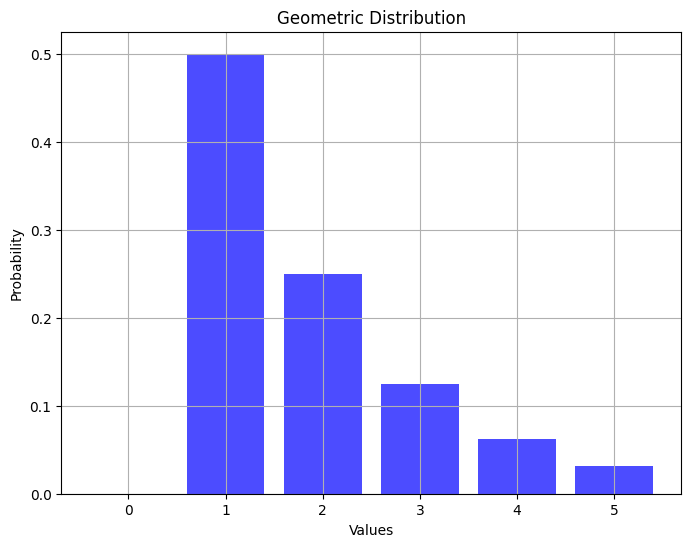

1.--- Probability Distribution Calculator ---


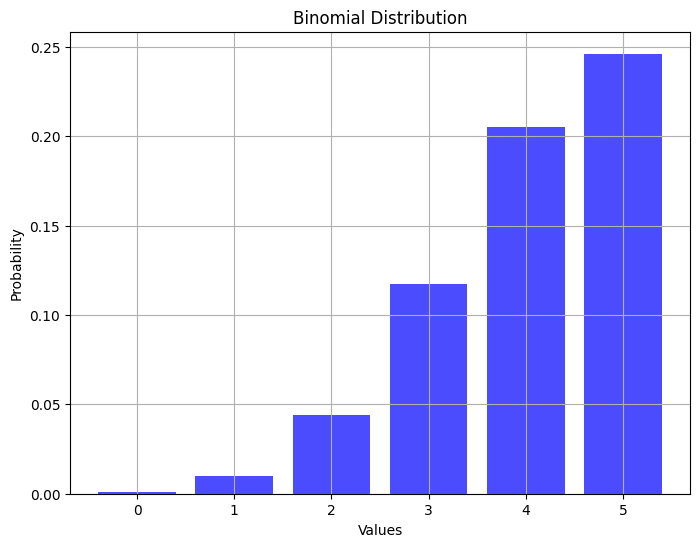

1.--- Probability Distribution Calculator ---


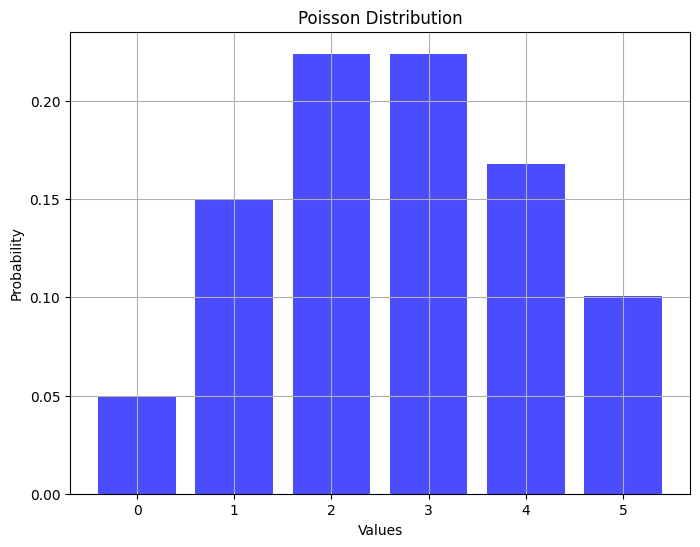

1.--- Probability Distribution Calculator ---


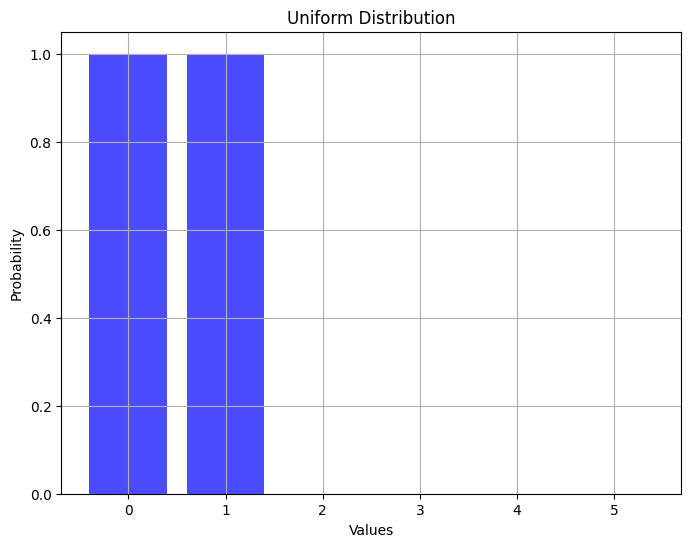

1.--- Probability Distribution Calculator ---
Error: Invalid distribution name.
1.--- Probability Distribution Calculator ---
Error: Invalid distribution name.
1.--- Probability Distribution Calculator ---
Exiting the program. Goodbye!


In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.stats import geom, binom, poisson, uniform

# Geometric distribution
def geometric(p, x):
    """
    Geometric distribution calculates the probability of the first success occurring on the x-th trial.
    Formula: P(X=x) = (1-p)^(x-1) * p
    """
    x = int(x)  # Ensure x is an integer
    if x < 1:
        return 0  # Probability is 0 for x < 1
    probability = (1 - p) ** (x - 1) * p
    return probability

# Binomial distribution
def binomial(n, p, x):
    """
    Binomial distribution calculates the probability of exactly x successes in n independent trials.
    Formula: P(X=x) = C(n, x) * p^x * (1-p)^(n-x)
    where C(n, x) = n! / (x! * (n-x)!)
    """
    n = int(n)  # Ensure n is an integer
    x = int(x)  # Ensure x is an integer
    if x < 0 or x > n:
        return 0  # Probability is 0 for invalid x
    combination = math.comb(n, x)  # C(n, x)
    probability = combination * (p ** x) * ((1 - p) ** (n - x))
    return probability

# Poisson distribution
def poisson_dist(mu, x):
    """
    Poisson distribution calculates the probability of exactly x events occurring in a fixed interval.
    Formula: P(X=x) = (mu^x * e^(-mu)) / x!
    """
    x = int(x)  # Ensure x is an integer
    if x < 0:
        return 0  # Probability is 0 for x < 0
    probability = (mu ** x) * (math.exp(-mu)) / math.factorial(x)
    return probability

# Uniform distribution
def uniform_dist(a, b, x):
    """
    Uniform distribution calculates the probability density for x within the range [a, b].
    Formula: f(x) = 1 / (b - a) for a <= x <= b, otherwise 0
    """
    if a <= x <= b:
        probability = 1 / (b - a)
    else:
        probability = 0  # Probability density is 0 outside the range [a, b]
    return probability

# Function to get the probability distribution
def get_probability_distribution(dist_name, params, vals):
    # Validate distribution name
    if dist_name not in ["geometric", "binomial", "poisson", "uniform"]:
        raise ValueError(f"Invalid distribution name: {dist_name}")
    
    # Validate vals for negative values
    vals = [v for v in vals if v >= 0]
    if not vals:
        raise ValueError("All numbers in 'vals' are negative!")
    
    # Choose the appropriate distribution function
    probabilities = []
    if dist_name == "geometric":
        p = params.get("p")
        if p is None or not (0 < p <= 1):
            raise ValueError("For geometric distribution, 'p' must be provided and be in the range (0, 1].")
        probabilities = [geometric(p, x) for x in vals]
    elif dist_name == "binomial":
        n = params.get("n")
        p = params.get("p")
        if n is None or not isinstance(n, int) or n <= 0:
            raise ValueError("For binomial distribution, 'n' must be a positive integer.")
        if p is None or not (0 <= p <= 1):
            raise ValueError("For binomial distribution, 'p' must be provided and be in the range [0, 1].")
        probabilities = [binomial(n, p, x) for x in vals]
    elif dist_name == "poisson":
        mu = params.get("mu")
        if mu is None or mu <= 0:
            raise ValueError("For Poisson distribution, 'mu' must be a positive number.")
        probabilities = [poisson_dist(mu, x) for x in vals]
    elif dist_name == "uniform":
        a = params.get("a")
        b = params.get("b")
        if a is None or b is None or not (a < b):
            raise ValueError("For uniform distribution, 'a' and 'b' must be provided with 'a' < 'b'.")
        probabilities = [uniform_dist(a, b, x) for x in vals]

    # Plot the distribution
    plt.figure(figsize=(8, 6))
    plt.bar(vals, probabilities, alpha=0.7, color='blue')
    plt.title(f"{dist_name.capitalize()} Distribution")
    plt.xlabel("Values")
    plt.ylabel("Probability")
    plt.grid(True)
    plt.show()

    return probabilities

def main():
    while True:
        print("1.--- Probability Distribution Calculator ---")
        choice = input("Enter your choice (1/2)")
        if choice == "2":
            print("Exiting the program. Goodbye!")
            break
        try:
            # Get distribution name
            dist_name = input("Enter the name of the distribution (Geometric/Binomial/Poisson/Uniform): ").strip().lower()
        
            # Distribution-specific parameters
            params = {}
            if dist_name == "geometric":
                vals = list(map(float, input("Enter the values (space-separated integers): ").split()))
                params["p"] = float(input("Enter the success probability (p): "))
            elif dist_name == "binomial":
                vals = list(map(float, input("Enter the values (space-separated integers): ").split()))
                params["n"] = int(input("Enter the number of trials (n): "))
                params["p"] = float(input("Enter the success probability (p): "))
            elif dist_name == "poisson":
                vals = list(map(float, input("Enter the values (space-separated integers): ").split()))
                params["mu"] = float(input("Enter the rate parameter mu: "))
            elif dist_name == "uniform":
                vals = list(map(float, input("Enter the values (space-separated integers): ").split()))
                params["a"] = float(input("Enter the start of the interval (a): "))
                params["b"] = float(input("Enter the end of the interval (b): "))
            else:
                raise ValueError("Invalid distribution name.")
        
        # Get probabilities
            probabilities = get_probability_distribution(dist_name, params, vals)
        
        except ValueError as e:
            print(f"Error: {e}")   
        except Exception as e:
            print(f"Unexpected error: {e}")

if __name__ == "__main__":
    main()
